## Write a Pandas program to create a Timewheel of Hour Vs Year comparison of the top 10 years in which the UFO was sighted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm

In [4]:
def timewheel():
    df = pd.read_csv('complete.csv')
    
    df['datetime'] = df['datetime'].astype('datetime64[ns]')
    most_sighting_years = df['datetime'].dt.year.value_counts().head(10)
    
    def is_top_year(year):
        if year in most_sighting_years.index:
            return year
        
    month_vs_year = df.pivot_table(columns=df['datetime'].dt.month,index=df['datetime'].dt.year.apply(is_top_year),aggfunc='count',values='city')
    month_vs_year.index = month_vs_year.index.astype(int)
    month_vs_year.columns = month_vs_year.columns.astype(int)
    
    def pie_heatmap(table: pd.pivot_table, cmap :str = 'coolwarm_r', vmin: int = None, vmax: int = None, inner_r: float = 0.25, pie_args: dict = {}):
        (n, m) = table.shape
        vmin = table.min().min() if vmin is None else vmin
        vmax = table.max().max() if vmax is None else vmax

        centre_circle = plt.Circle((0, 0), inner_r, edgecolor='black', facecolor='white', fill=True, linewidth=0.25)
        plt.gcf().gca().add_artist(centre_circle)
        norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
        cmapper = cm.ScalarMappable(norm=norm, cmap=cmap)

        for (i, (row_name, row)) in enumerate(table.iterrows()):
            labels = None if i > 0 else table.columns
            wedges = plt.pie([1] * m, radius=inner_r + float(n - i) / n, colors=[cmapper.to_rgba(x) for x in row.values],
                            labels=labels, startangle=90, counterclock=False, wedgeprops={'linewidth':-1}, **pie_args)
            plt.setp(wedges[0], edgecolor='grey', linewidth=1.5)
            
            wedges = plt.pie([1], radius=inner_r + float(n - i - 1) / n, colors=['w'], labels=[row_name], startangle=-90, wedgeprops={'linewidth':0})
            plt.setp(wedges[0], edgecolor='grey', linewidth=1.5)
        
    plt.figure(figsize=(8,8))
    plt.title("Timewheel of Hour Vs Year", y=1.08, fontsize=30)
    pie_heatmap(month_vs_year, vmin=-20, vmax=80, inner_r=0.2)

In [ ]:
timewheel()

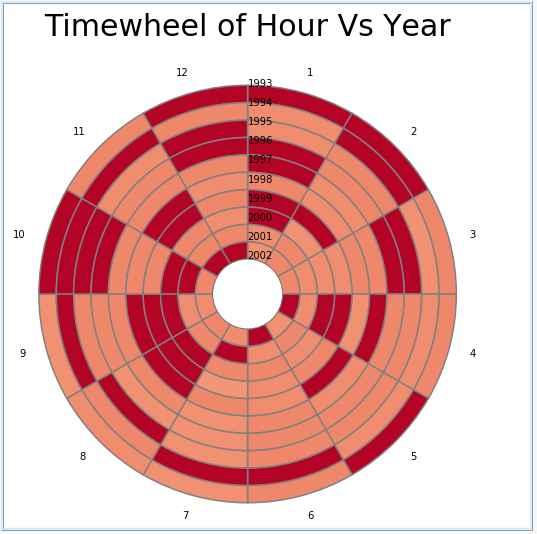